# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
                                 
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howrah
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | potosi
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | cabedelo
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | bada
Processing Record 13 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | kirakira
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | limulunga
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | erenhot
Processing Record 22 of Set 1 | k

Processing Record 38 of Set 4 | kitimat
Processing Record 39 of Set 4 | zapolyarnyy
Processing Record 40 of Set 4 | lukolela
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | bubaque
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | punta arenas
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | olyokminsk
Processing Record 48 of Set 4 | saksaul'skiy
City not found. Skipping...
Processing Record 49 of Set 4 | fale old settlement
Processing Record 0 of Set 5 | san patricio
Processing Record 1 of Set 5 | rikaze
Processing Record 2 of Set 5 | la'ie
Processing Record 3 of Set 5 | ellensburg
Processing Record 4 of Set 5 | enewetak
Processing Record 5 of Set 5 | washington
Processing Record 6 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | metlili chaamba
Processing Record 9 of Set 5 | ghadamis
Processing Rec

Processing Record 27 of Set 8 | colonia
Processing Record 28 of Set 8 | bakchar
Processing Record 29 of Set 8 | ulsan
Processing Record 30 of Set 8 | chibougamau
Processing Record 31 of Set 8 | punta alta
Processing Record 32 of Set 8 | cananeia
Processing Record 33 of Set 8 | taltal
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | yangambi
Processing Record 36 of Set 8 | san antonio de pale
Processing Record 37 of Set 8 | tchintabaraden
Processing Record 38 of Set 8 | peterborough
Processing Record 39 of Set 8 | niafunke
Processing Record 40 of Set 8 | kourou
Processing Record 41 of Set 8 | pontevedra
Processing Record 42 of Set 8 | rantauprapat
Processing Record 43 of Set 8 | erdenet
Processing Record 44 of Set 8 | nasiriyah
Processing Record 45 of Set 8 | ulladulla
Processing Record 46 of Set 8 | manaquiri
Processing Record 47 of Set 8 | nueva gerona
Processing Record 48 of Set 8 | nemuro
Processing Record 49 of Set 8 | indramayu
Processing Record 0 of Set 9 |

Processing Record 15 of Set 12 | dompu
Processing Record 16 of Set 12 | businga
Processing Record 17 of Set 12 | palikir - national government center
Processing Record 18 of Set 12 | markovo
Processing Record 19 of Set 12 | santiago del estero
Processing Record 20 of Set 12 | porto cristo
Processing Record 21 of Set 12 | zamora
Processing Record 22 of Set 12 | tidjikja
Processing Record 23 of Set 12 | petauke
Processing Record 24 of Set 12 | bechar
Processing Record 25 of Set 12 | tutoia
Processing Record 26 of Set 12 | al wakrah
Processing Record 27 of Set 12 | anshun
Processing Record 28 of Set 12 | mildura
Processing Record 29 of Set 12 | indergarh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howrah,22.5892,88.3103,30.00,54,40,3.09,IN,1708332003
1,albany,42.6001,-73.9662,-0.52,78,69,1.79,US,1708331748
2,bethel,41.3712,-73.4140,0.27,62,0,2.57,US,1708332003
3,potosi,-19.5836,-65.7531,7.23,92,100,0.90,BO,1708332003
4,iqaluit,63.7506,-68.5145,-32.15,68,0,10.29,CA,1708332004


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,30.00,54,40,3.09,IN,1708332003
1,albany,42.6001,-73.9662,-0.52,78,69,1.79,US,1708331748
2,bethel,41.3712,-73.4140,0.27,62,0,2.57,US,1708332003
3,potosi,-19.5836,-65.7531,7.23,92,100,0.90,BO,1708332003
4,iqaluit,63.7506,-68.5145,-32.15,68,0,10.29,CA,1708332004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

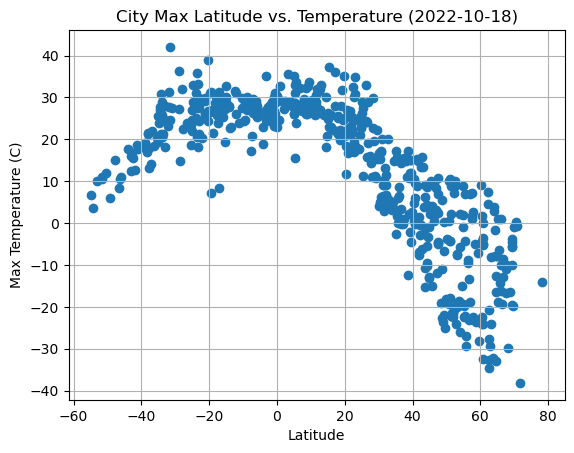

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

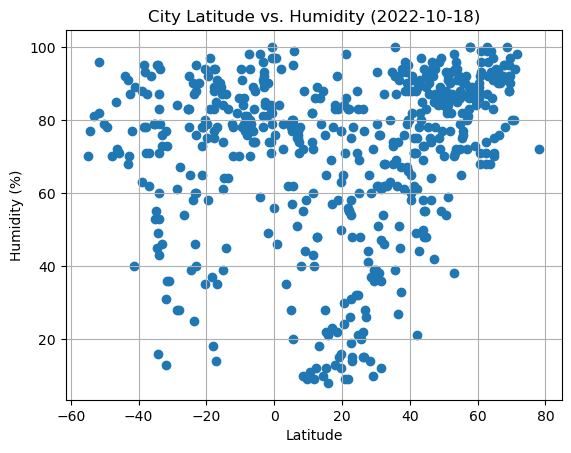

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

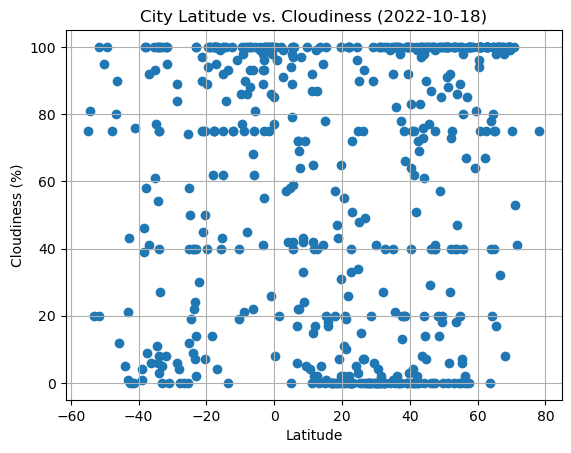

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

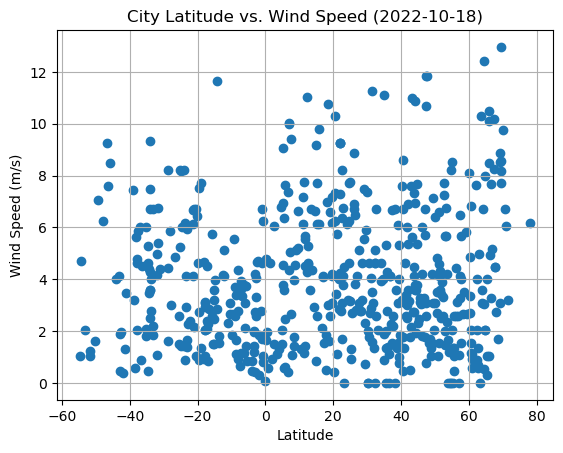

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,30.00,54,40,3.09,IN,1708332003
1,albany,42.6001,-73.9662,-0.52,78,69,1.79,US,1708331748
2,bethel,41.3712,-73.4140,0.27,62,0,2.57,US,1708332003
4,iqaluit,63.7506,-68.5145,-32.15,68,0,10.29,CA,1708332004
5,udachny,66.4167,112.4000,-19.20,76,100,4.92,RU,1708332004


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,potosi,-19.5836,-65.7531,7.23,92,100,0.90,BO,1708332003
6,cabedelo,-6.9811,-34.8339,26.37,79,100,3.34,BR,1708332004
7,edinburgh of the seven seas,-37.0676,-12.3116,14.22,62,92,6.01,SH,1708332004
8,adamstown,-25.0660,-130.1015,24.59,83,58,5.23,PN,1708332005
12,kirakira,-10.4544,161.9205,27.51,86,40,2.67,SB,1708332006


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7304134097081304


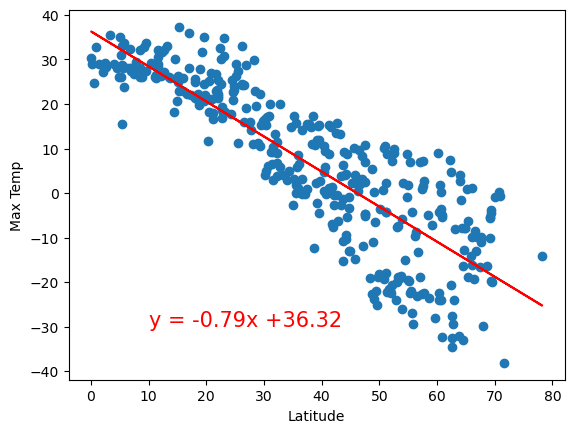

In [14]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-30), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.3307455059234659


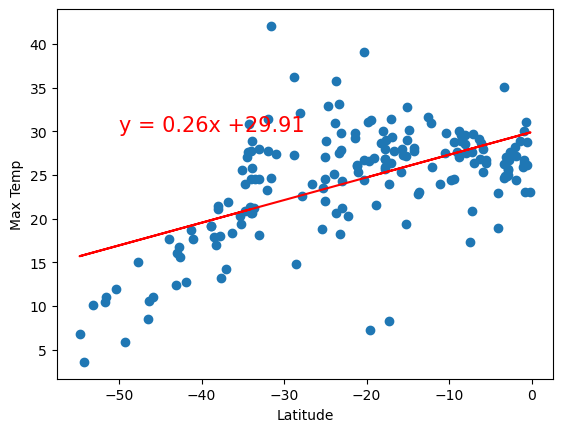

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-50,30), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2334240326001155


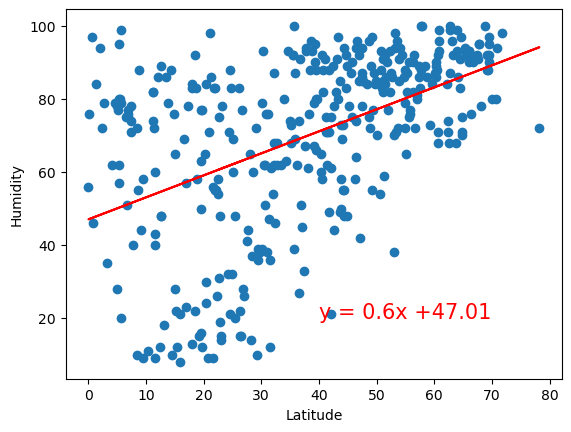

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(40,20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.036635155876746005


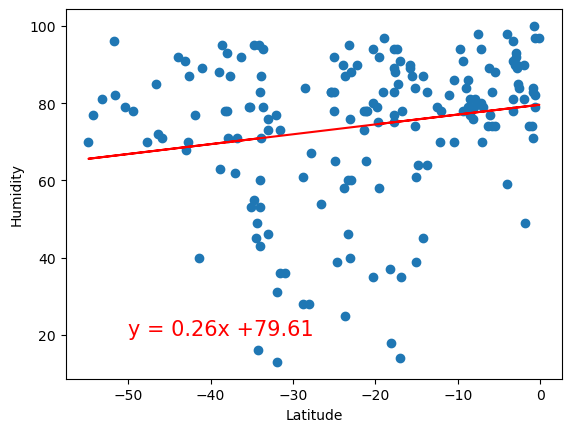

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09226584044854717


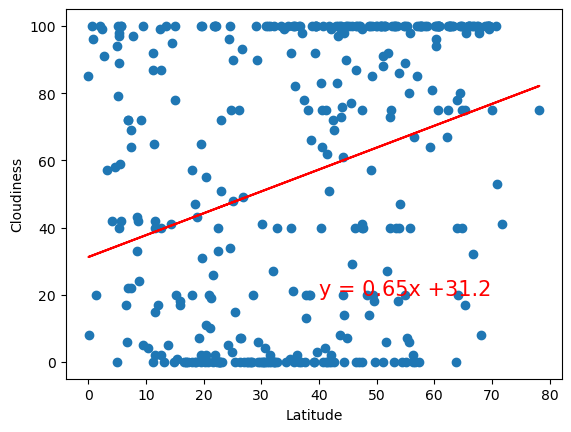

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(40,20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.1357948526120332


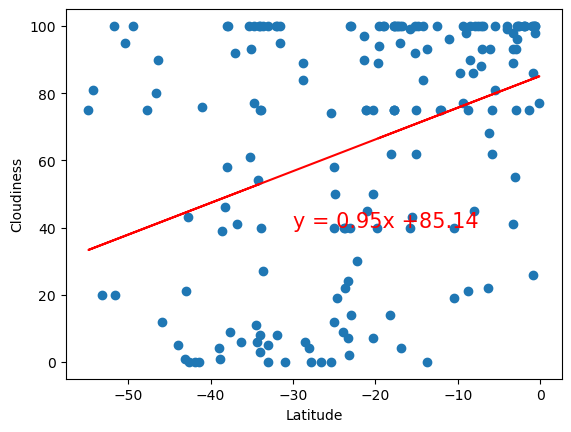

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-30,40), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0002487277930783796


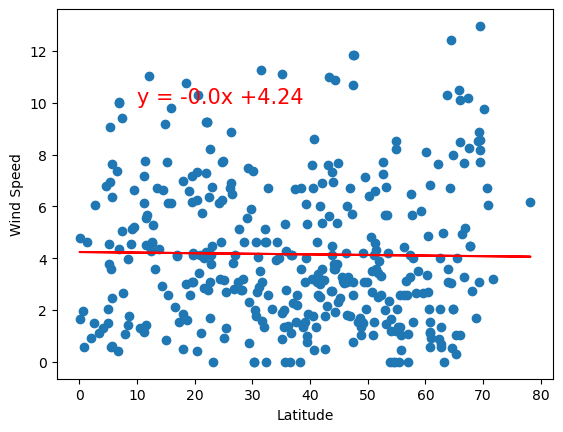

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.053682838671251856


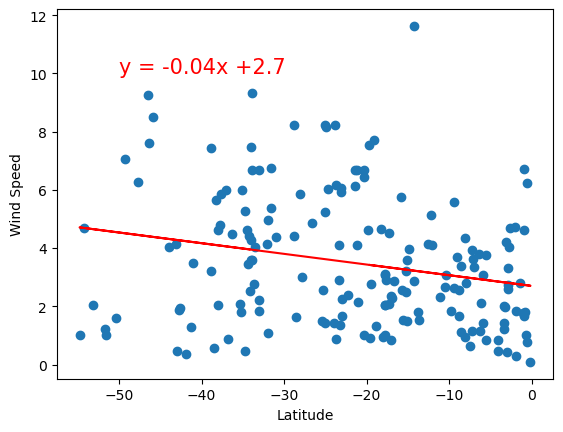

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Plot labels and annotated line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE